### BL.EN.U4AIE21085

In [41]:
## Question 1
## Use numpy.fft.fft()to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio, display


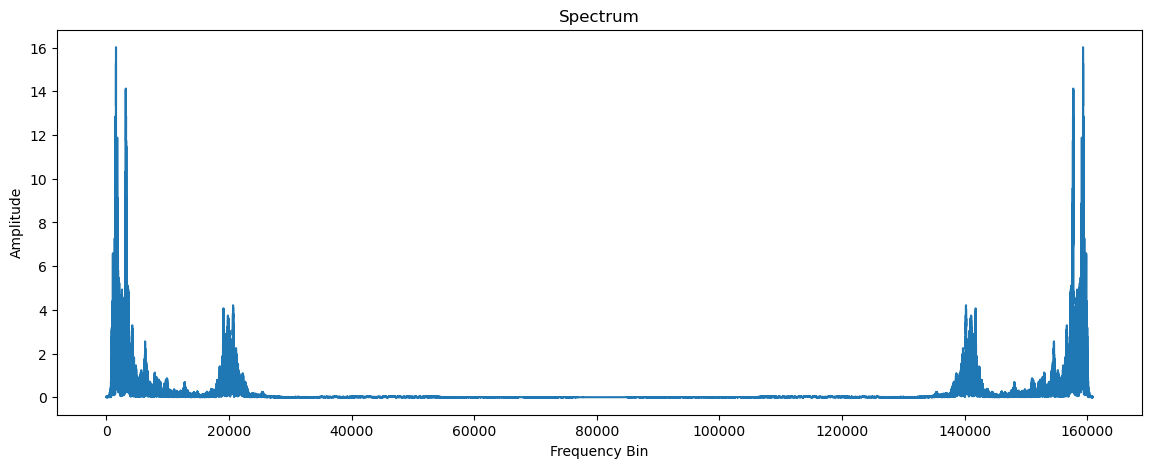

In [43]:
shreya, sr = librosa.load(r"E:\Shreya Kunda\Amrita 2021-2025\Amrita Semester Academics\SEMESTER 6\Speech Processing\Lab\Audio Files\shreya.wav")
## fft
ffts = np.fft.fft(shreya)
plt.figure(figsize=(14, 5))
plt.plot(np.abs(ffts))
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')
plt.show()


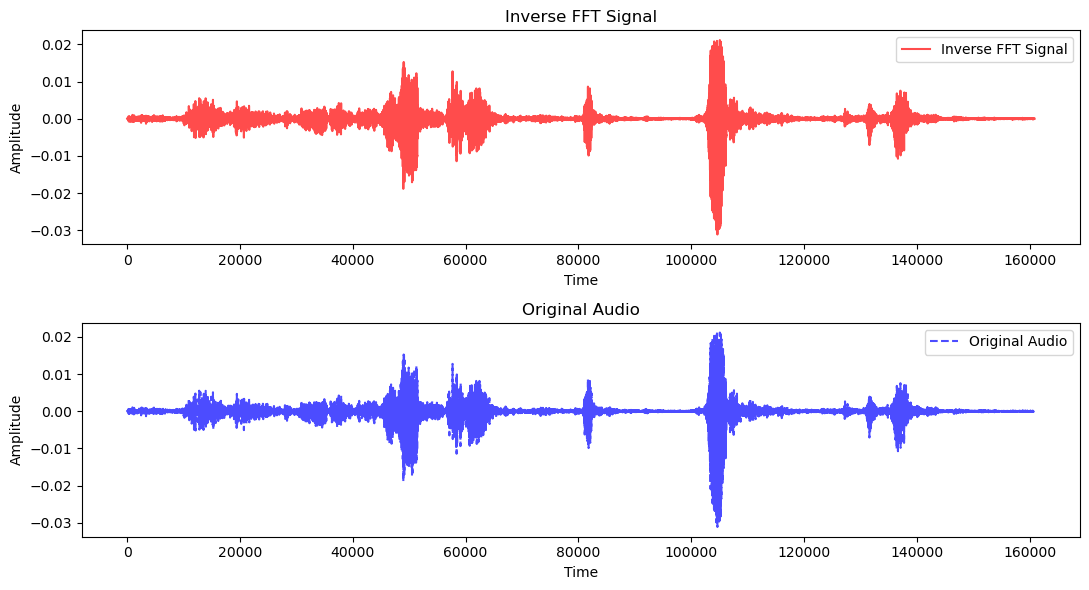

In [50]:
## Question 2 
#Use numpy.fft.ifft()to inverse transform the frequency spectrum of the speech signal from frequency domain to time domain. Compare the generated time domain signal with the original signal.

# Perform inverse transform
inversed = np.fft.ifft(ffts)


# Compare the generated time domain signal with the original signal
fig, axs = plt.subplots(2, figsize=(11, 6))

# Plot the inverse FFT signal
axs[0].plot(inversed.real, color='red', linestyle='-', label='Inverse FFT Signal', alpha=0.7)

# Plot the original audio
axs[1].plot(y, color='blue', linestyle='--', label='Original Audio', alpha=0.7)

axs[0].set(title='Inverse FFT Signal', xlabel='Time', ylabel='Amplitude')
axs[1].set(title='Original Audio', xlabel='Time', ylabel='Amplitude')

axs[0].legend()
axs[1].legend()

plt.tight_layout()
plt.show()



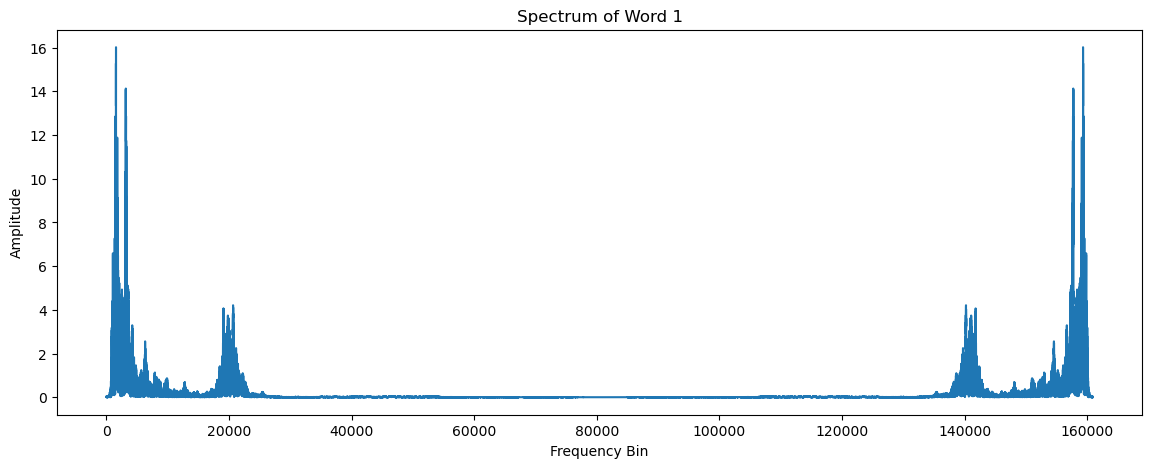

In [63]:
## Question 3
## Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum with the spectrum of the full signal.
threshold = np.percentile(np.abs(shreya), 92)  

segments = librosa.effects.split(y, top_db=-20*np.log10(threshold))

for i, (start, end) in enumerate(segments):
    word = y[start:end]
    D_word = np.fft.fft(word)

    plt.figure(figsize=(14, 5))
    plt.plot(np.abs(D_word))
    plt.title(f'Spectrum of Word {i+1}')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Amplitude')
    plt.show()

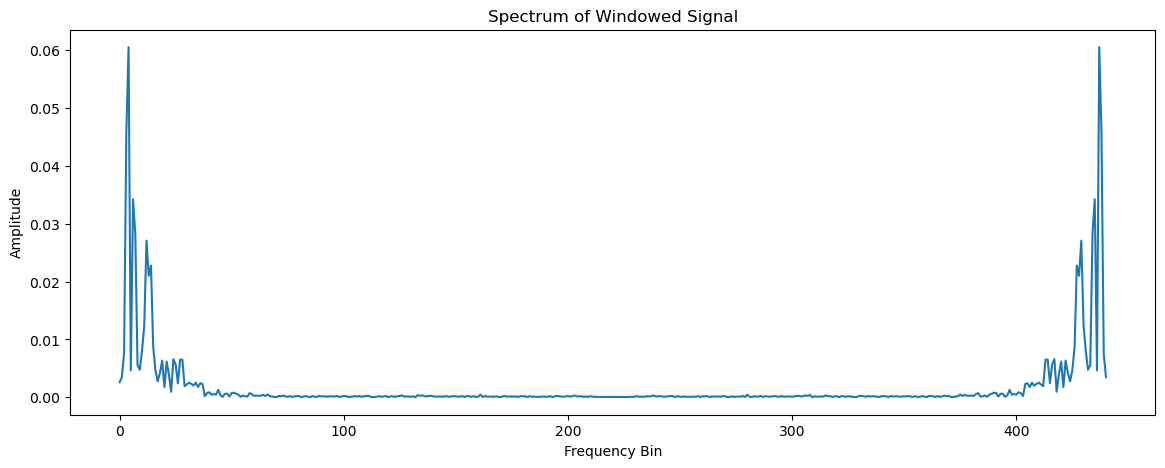

In [64]:
## Question 4
## Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components.
import scipy.signal as signal
frame = int(0.02*sr)
w = signal.windows.boxcar(frame)
ww = np.fft.fft(y[:frame] * w)
plt.figure(figsize=(14, 5))
plt.plot(np.abs(ww))
plt.title('Spectrum of Windowed Signal')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')
plt.show()


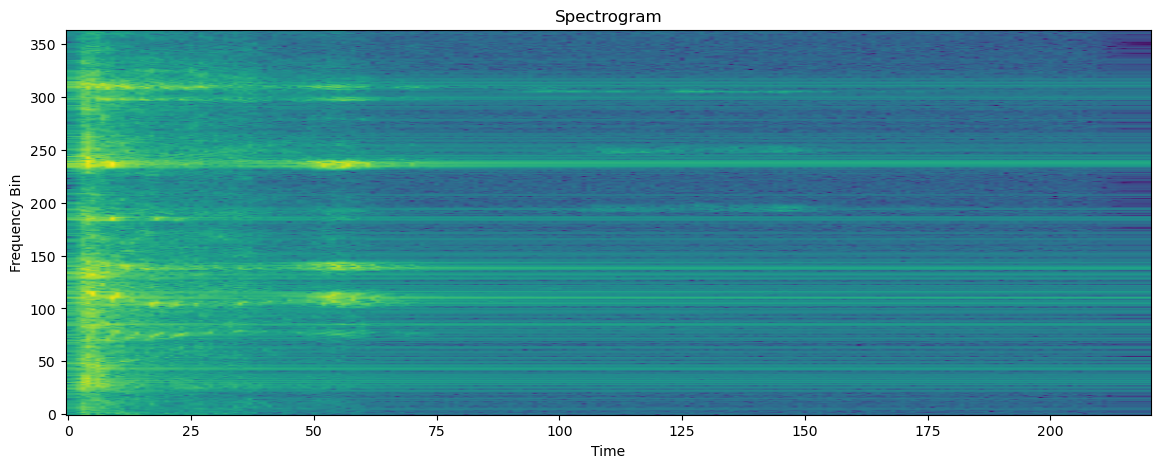

In [61]:
## Question 5
## Break your speech signal into window lengths of 20 mSec intervals.Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix.You may use librosa.stft()or scipy.signal.stft()as well to achieve this.

f = librosa.util.frame(y, frame_length=frame_length, hop_length=frame_length)
## FFT
ff = np.fft.rfft(f * win[:, np.newaxis], axis=0)
## Stacking
m = np.column_stack(ff)
## Display
plt.figure(figsize=(14, 5))
plt.imshow(20*np.log10(np.abs(m)), aspect='auto', origin='lower')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency Bin')
plt.show()

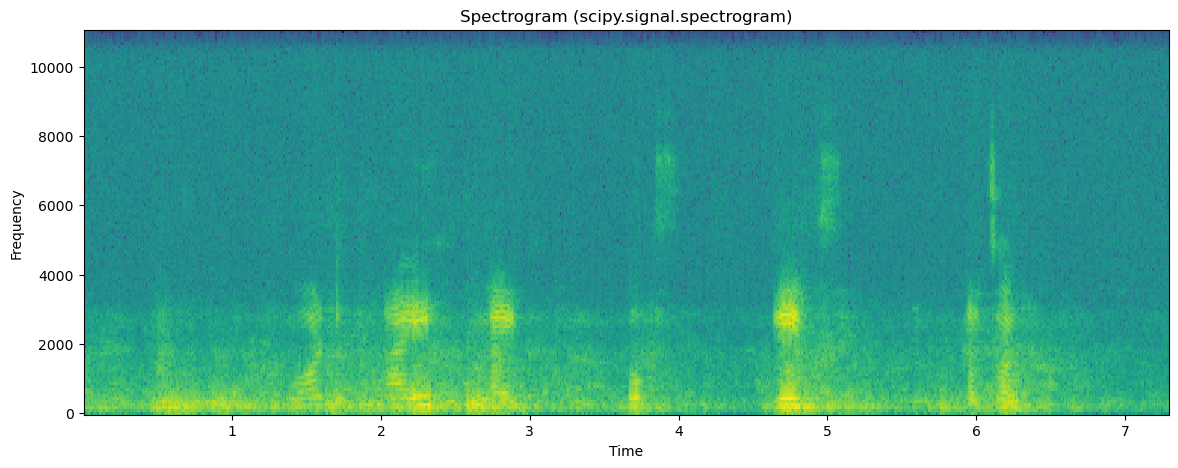

In [62]:
# Question 6
## Use scipy's signal.spectrogram function to plot the spectrogram of the speech signal
frequencies, times, Sxx = signal.spectrogram(y, sr)
plt.figure(figsize=(14, 5))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
plt.title('Spectrogram (scipy.signal.spectrogram)')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()